In [45]:
%matplotlib inline
# A simple speech synthesis and speech recognition pipeline

from modules.Tacotron_de import Tacotron_de
from modules.Deepspeech2 import Deepspeech2
from modules.audio_resample import Resample
from modules.text_encoder import TextEncoder
from modules.Transformer import Transformer
from modules.text_decoder import TextDecoder
from modules.Jasper import Jasper
from modules.Wave2Letter import Wave2Letter
from modules.TransformerBig import TransformerBig
from modules.Convs2s import Convs2s

from contextlib import contextmanager
import time
import numpy as np
import matplotlib.pyplot as plt 

import librosa
import IPython
from OpenSeq2Seq.open_seq2seq.models.text2speech import save_audio


@contextmanager
def timeit_context(name):
    startTime = time.time()
    yield
    elapsedTime = time.time() - startTime
    print('[{}] finished in {} ms'.format(name, int(elapsedTime * 1000)))

In [46]:

# Initialize and setup all modules
taco = Tacotron()
taco.Setup()

taco_de = Tacotron_de()
taco_de.Setup()

speech_synthesis = taco_de

# ============ Speech Recognition Modules ============
deepspeech = Deepspeech2()
deepspeech.Setup()

jasper = Jasper()
jasper.Setup()

wave2letter = Wave2Letter()
wave2letter.Setup()

speech_recognition = wave2letter
# ============ Speech Recognition Modules ============

resample = Resample()
resample.Setup()

encoder = TextEncoder()
encoder.Setup()

# ============ Translation Modules ============
transformer = Transformer()
transformer.Setup()

transformer_big = TransformerBig()
transformer_big.Setup()

conv_s2s = Convs2s()
conv_s2s.Setup()

translation = transformer
# ============ Translation Modules ============

decoder = TextDecoder()
decoder.Setup()



In [47]:
inputs = [
    "/home/oscar/sdb3/data/Librispeech/LibriSpeech/train-clean-100-wav/226-131533-0000.wav",
    "/home/oscar/sdb3/data/Librispeech/LibriSpeech/train-clean-100-wav/226-131533-0001.wav",
    "/home/oscar/sdb3/data/Librispeech/LibriSpeech/train-clean-100-wav/226-131533-0002.wav",
    "/home/oscar/sdb3/data/Librispeech/LibriSpeech/train-clean-100-wav/226-131533-0003.wav",
    "/home/oscar/sdb3/data/Librispeech/LibriSpeech/train-clean-100-wav/226-131533-0004.wav",
    "/home/oscar/sdb3/data/Librispeech/LibriSpeech/train-clean-100-wav/226-131533-0005.wav",
    "/home/oscar/sdb3/data/Librispeech/LibriSpeech/train-clean-100-wav/226-131533-0006.wav",
    "/home/oscar/sdb3/data/Librispeech/LibriSpeech/train-clean-100-wav/226-131533-0007.wav",
    "/home/oscar/sdb3/data/Librispeech/LibriSpeech/train-clean-100-wav/226-131533-0008.wav",
    "/home/oscar/sdb3/data/Librispeech/LibriSpeech/train-clean-100-wav/226-131533-0009.wav",
    "/home/oscar/sdb3/data/Librispeech/LibriSpeech/train-clean-100-wav/226-131533-0010.wav",
    "/home/oscar/sdb3/data/Librispeech/LibriSpeech/train-clean-100-wav/226-131533-0011.wav",
    "/home/oscar/sdb3/data/Librispeech/LibriSpeech/train-clean-100-wav/226-131533-0012.wav",
    "/home/oscar/sdb3/data/Librispeech/LibriSpeech/train-clean-100-wav/226-131533-0013.wav"
]

In [49]:

for i in range(0, len(inputs)):

    # Input
    input_audio, sr = librosa.load(inputs[i])
    print("input np array length = {}".format(len(input_audio)))

    wav = input_audio
    # Speech recognition module
    with timeit_context('speech_recognition_pre'):
        pre = speech_recognition.PreProcess([wav])
    with timeit_context('speech_recognition_apply'):
        app = speech_recognition.Apply(pre)
    with timeit_context('speech_recognition_post'):
        post = speech_recognition.PostProcess(*app)

    #     print(post)
    with timeit_context('encoder'):
        # Encoding esizenglish text
        encoded_text = encoder.Apply(post)

    # Translation module
    with timeit_context('translation_pre'):
        pre = translation.PreProcess([encoded_text])
    with timeit_context('translation_apply'):
        app = translation.Apply(pre)
    with timeit_context('translation_post'):
        post = translation.PostProcess(*app)

    with timeit_context('decoder'):
        # Decoding German text
        decoded_text = decoder.Apply(post)

    print("Translation")
    print(decoded_text)

    text = decoded_text
    # Speech synthesis module
    with timeit_context('speech synthesis_pre'):
        pre = speech_synthesis.PreProcess([text])
    with timeit_context('speech synthesis_apply'):
        app = speech_synthesis.Apply(pre)
    with timeit_context('speech synthesis_post'):
        post = speech_synthesis.PostProcess(*app)

    wav = save_audio(post, "unused", "unused", sampling_rate=16000, save_format="np.array", n_fft=800)
    audio = IPython.display.Audio(wav, rate=16000)
    IPython.display.display(audio)
    # This part is out of the pipeline, just for debug purpose




input np array length = 272097
[speech_recognition_pre] finished in 18 ms
[speech_recognition_apply] finished in 46 ms
[speech_recognition_post] finished in 0 ms
[encoder] finished in 0 ms
[translation_pre] finished in 0 ms
[translation_apply] finished in 489 ms
[translation_post] finished in 0 ms
[decoder] finished in 0 ms
Translation
Sie die meisten der ⁇ bo drei Wochen purt ove Nitfer f graham in te in er keine thoost Freunde▁yo Bruder in tethir irdisch rother Wahrheit betrachten alt durch
[speech synthesis_pre] finished in 0 ms
[speech synthesis_apply] finished in 766 ms
[speech synthesis_post] finished in 0 ms


input np array length = 268459
[speech_recognition_pre] finished in 18 ms
[speech_recognition_apply] finished in 44 ms
[speech_recognition_post] finished in 0 ms
[encoder] finished in 0 ms
[translation_pre] finished in 0 ms
[translation_apply] finished in 529 ms
[translation_post] finished in 0 ms
[decoder] finished in 0 ms
Translation
see▁called mityo▁birth by my▁proof eplawyer and i▁cold her fom en horon▁him feem that▁beam▁written in her palk i▁felt▁hem▁attempt to fe her▁above▁twife a week.
[speech synthesis_pre] finished in 0 ms
[speech synthesis_apply] finished in 784 ms
[speech synthesis_post] finished in 0 ms


input np array length = 374079
[speech_recognition_pre] finished in 25 ms
[speech_recognition_apply] finished in 60 ms
[speech_recognition_post] finished in 0 ms
[encoder] finished in 0 ms
[translation_pre] finished in 0 ms
[translation_apply] finished in 630 ms
[translation_post] finished in 0 ms
[decoder] finished in 0 ms
Translation
und ⁇  ich habe oder trage mich f ⁇ r das redrolto erfiin ist oft  ⁇ berkühlt f ⁇ r mich neer Thory, um extrem vorsichtig zu hered Olfogither i ⁇  die dritte f ⁇ r die Gelegenheit hatte
[speech synthesis_pre] finished in 0 ms
[speech synthesis_apply] finished in 1083 ms
[speech synthesis_post] finished in 1 ms


input np array length = 343209
[speech_recognition_pre] finished in 23 ms
[speech_recognition_apply] finished in 52 ms
[speech_recognition_post] finished in 0 ms
[encoder] finished in 0 ms
[translation_pre] finished in 0 ms
[translation_apply] finished in 620 ms
[translation_post] finished in 0 ms
[decoder] finished in 0 ms
Translation
▁yetle konnte nicht setzen porfebefei gute Zeiten durch a ⁇ y und die dritte ⁇  mit ihr ⁇  youroluson und truy i my▁folk wo' nicht ganz infronte mit dem Wächter ⁇  so Bruder wir bekannt s lange der sehr
[speech synthesis_pre] finished in 0 ms
[speech synthesis_apply] finished in 1133 ms
[speech synthesis_post] finished in 1 ms


input np array length = 339129
[speech_recognition_pre] finished in 23 ms
[speech_recognition_apply] finished in 51 ms
[speech_recognition_post] finished in 0 ms
[encoder] finished in 0 ms
[translation_pre] finished in 0 ms
[translation_apply] finished in 610 ms
[translation_post] finished in 0 ms
[decoder] finished in 0 ms
Translation
▁asthey should▁tonfrot my falt or molf confounded ⁇  ocrew with it all i▁thought town or ⁇  ro▁fill her in▁spite of her▁stroth i would not ⁇  to her▁noble huro modwiic rothnd.
[speech synthesis_pre] finished in 0 ms
[speech synthesis_apply] finished in 1619 ms
[speech synthesis_post] finished in 2 ms


input np array length = 273090
[speech_recognition_pre] finished in 18 ms
[speech_recognition_apply] finished in 52 ms
[speech_recognition_post] finished in 0 ms
[encoder] finished in 0 ms
[translation_pre] finished in 0 ms
[translation_apply] finished in 682 ms
[translation_post] finished in 0 ms
[decoder] finished in 0 ms
Translation
und Wal wir Gott sei Dank in sie mein provent the ⁇ un konnte ich mich nicht fror wiff und hoffen, dass er bitter in Zukunft oder oh unseren i kook Fuß-Stream und ferally to wher aber aber.
[speech synthesis_pre] finished in 0 ms
[speech synthesis_apply] finished in 870 ms
[speech synthesis_post] finished in 0 ms


input np array length = 357872
[speech_recognition_pre] finished in 31 ms
[speech_recognition_apply] finished in 63 ms
[speech_recognition_post] finished in 0 ms
[encoder] finished in 0 ms
[translation_pre] finished in 0 ms
[translation_apply] finished in 644 ms
[translation_post] finished in 0 ms
[decoder] finished in 0 ms
Translation
I'm▁going to world▁cro whol▁warn cu what▁makes you tink ⁇  we▁cul▁hem walk ovet you warm but i▁wish ⁇ 't goful▁oftene nonflence tro i don't go one rin▁thick weenk what do you▁mean
[speech synthesis_pre] finished in 0 ms
[speech synthesis_apply] finished in 1002 ms
[speech synthesis_post] finished in 0 ms


input np array length = 336373
[speech_recognition_pre] finished in 23 ms
[speech_recognition_apply] finished in 51 ms
[speech_recognition_post] finished in 0 ms
[encoder] finished in 0 ms
[translation_pre] finished in 0 ms
[translation_apply] finished in 541 ms
[translation_post] finished in 0 ms
[decoder] finished in 0 ms
Translation
gut, aber er foug waren ihm o ⁇ 'n for ⁇  zu sagen ⁇  von Raum, wenn Rolle oder y ⁇  o geben in die vorpealing Meinung keine Rückkehr zu sehen hor▁peteevingly
[speech synthesis_pre] finished in 0 ms


_Rendezvous: <_Rendezvous of RPC that terminated with:
	status = StatusCode.RESOURCE_EXHAUSTED
	details = "Received message larger than max (4368265 vs. 4194304)"
	debug_error_string = "{"created":"@1554757679.606000929","description":"Error received from peer","file":"src/core/lib/surface/call.cc","file_line":1099,"grpc_message":"Received message larger than max (4368265 vs. 4194304)","grpc_status":8}"
>

In [43]:
@contextmanager
def timeit_context(name, timestamps):
    startTime = time.time()
    yield
    elapsedTime = time.time() - startTime
    t = int(elapsedTime * 1000)
    print('[{}] finished in {} ms'.format(name, t))
    timestamps.append(t)

In [31]:
def tts(timestamps):
    pre = speech_synthesis.PreProcess([text])
    for i in range(1, 100):
        with timeit_context("speech_synthesis timeit", timestamps):
            app = speech_synthesis.Apply(pre)
    post = speech_synthesis.PostProcess(*app)

def stt(timestamps):
    pre = speech_recognition.PreProcess([wav])
    for i in range(1, 100):
        with timeit_context("speech_recognition timeit",timestamps):
            app = speech_recognition.Apply(pre)
    post = speech_recognition.PostProcess(*app)

def ttt(timestamps):
    pre = translation.PreProcess([encoded_text])
    for i in range(1, 100):
        with timeit_context("translation timeit",timestamps):
            app = translation.Apply(pre)
    post = translation.PostProcess(*app)

[speech_synthesis timeit] finished in 800 ms
[speech_synthesis timeit] finished in 759 ms
[speech_synthesis timeit] finished in 774 ms
[speech_synthesis timeit] finished in 780 ms
[speech_synthesis timeit] finished in 759 ms
[speech_synthesis timeit] finished in 919 ms
[speech_synthesis timeit] finished in 744 ms
[speech_synthesis timeit] finished in 743 ms
[speech_synthesis timeit] finished in 772 ms
[speech_synthesis timeit] finished in 790 ms
[speech_synthesis timeit] finished in 755 ms
[speech_synthesis timeit] finished in 730 ms
[speech_synthesis timeit] finished in 727 ms
[speech_synthesis timeit] finished in 753 ms
[speech_synthesis timeit] finished in 760 ms
[speech_synthesis timeit] finished in 736 ms
[speech_synthesis timeit] finished in 731 ms
[speech_synthesis timeit] finished in 746 ms
[speech_synthesis timeit] finished in 733 ms
[speech_synthesis timeit] finished in 817 ms
[speech_synthesis timeit] finished in 743 ms
[speech_synthesis timeit] finished in 753 ms
[speech_sy

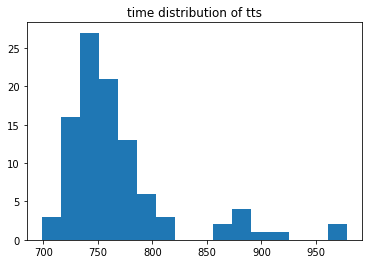

In [32]:
timestamps = []
thread1 = threading.Thread(target = tts, args = (timestamps,)) 
thread1.start()
thread1.join()
a = np.hstack(timestamps)
plt.hist(a, bins='auto')  # arguments are passed to np.histogram

plt.title('time distribution of tts')
plt.show()